# Анализ продаж автомобилей

Ссылка на dataset: https://www.kaggle.com/datasets/ddosad/auto-sales-data/data

## Цели проекта:
1. Проанализировать объем продаж по странам и выявить ключевые рынки.
2. Изучить, как размер сделки влияет на объем продаж и определить предпочитаемые размеры сделок.
3. Понять, какие продуктовые позиции проносят наибольшие продажи.
4. Изучить распредиление продаж с течением времени и выявить возможные сезонные паттерны.

## 1. Загрузка и предобработка данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Auto Sales data.csv')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.shape

(2747, 20)

In [5]:
df.dtypes

ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                object
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object

In [6]:
# Удаление столбцов, не влияющих на анализ 
df = df.drop(columns=['PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'])

In [7]:
# Изменение формата даты
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,90110,Finland,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,31000,France,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,Boston,51003,USA,Medium


In [8]:
# Изменение столбца, который показывает прошедшее время с момента покупки
df['DAYS_SINCE_LASTORDER'] = (pd.to_datetime('2020-06-01') - df['ORDERDATE']).dt.days

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  CITY                  2747 non-null   object        
 13  POSTALCODE        

In [10]:
# Делаем столбец "категорией" и меняем содержание на числовые коды
df['STATUS'] = df['STATUS'].astype('category').cat.codes

In [11]:
df.duplicated().sum()

np.int64(0)

Дубликаты отсутствуют

In [12]:
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,5,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,10022,USA,Small
1,10121,34,81.35,5,2765.90,2018-05-07,756,5,Motorcycles,95,S10_1678,Reims Collectables,Reims,51100,France,Small
2,10134,41,94.74,2,3884.34,2018-07-01,701,5,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,75508,France,Medium


## 2. Исследовательский анализ данных (EDA)

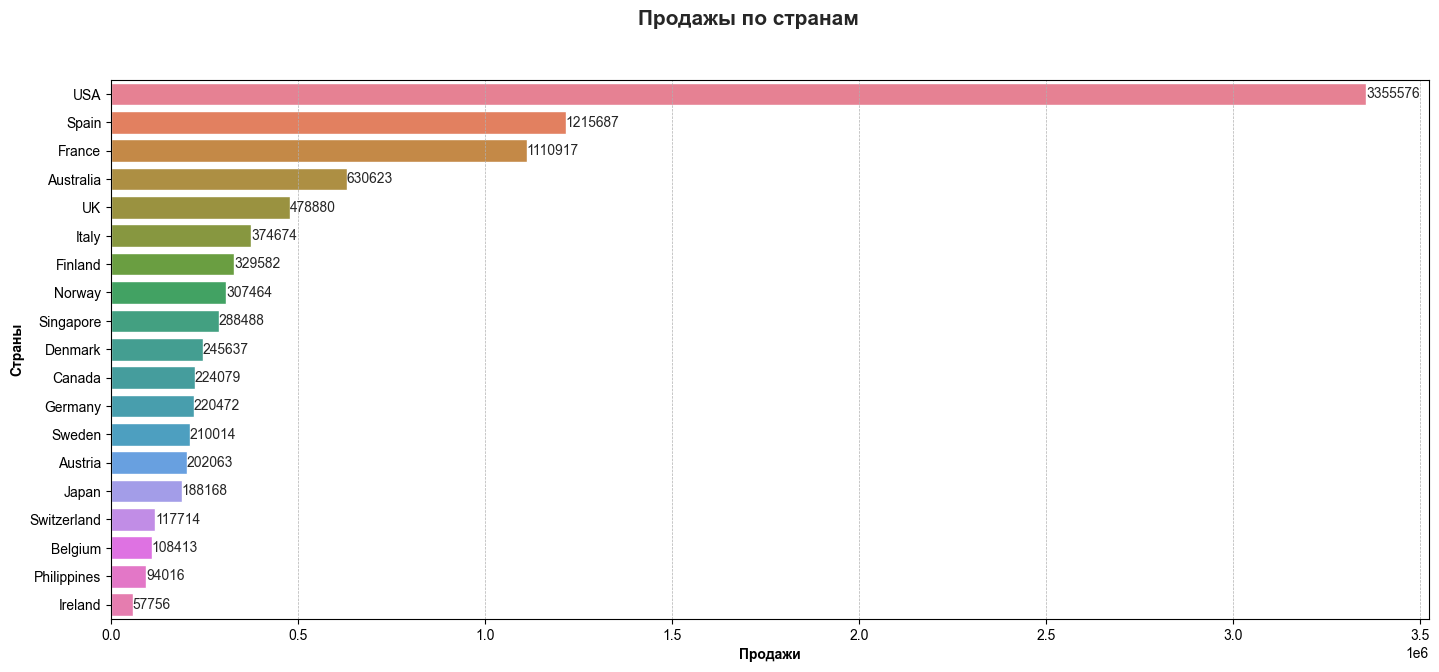

In [13]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(17, 7))

sns.set_style('whitegrid')
ax.grid(True, linestyle='--', linewidth=0.5)

sns.barplot(ax=ax, data=country_sales, y='COUNTRY', x='SALES', hue='COUNTRY')

fig.suptitle("Продажы по странам", fontsize=15, fontweight='heavy')

ax.set_ylabel('Страны', fontweight='bold')
ax.set_xlabel('Продажи', fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

Диаграмма показывает, что продажи наиболее высоки в США, за ними следуют Испания и Германия. Это указывает на сосредоточение основной клиентской базы в определенных странах.

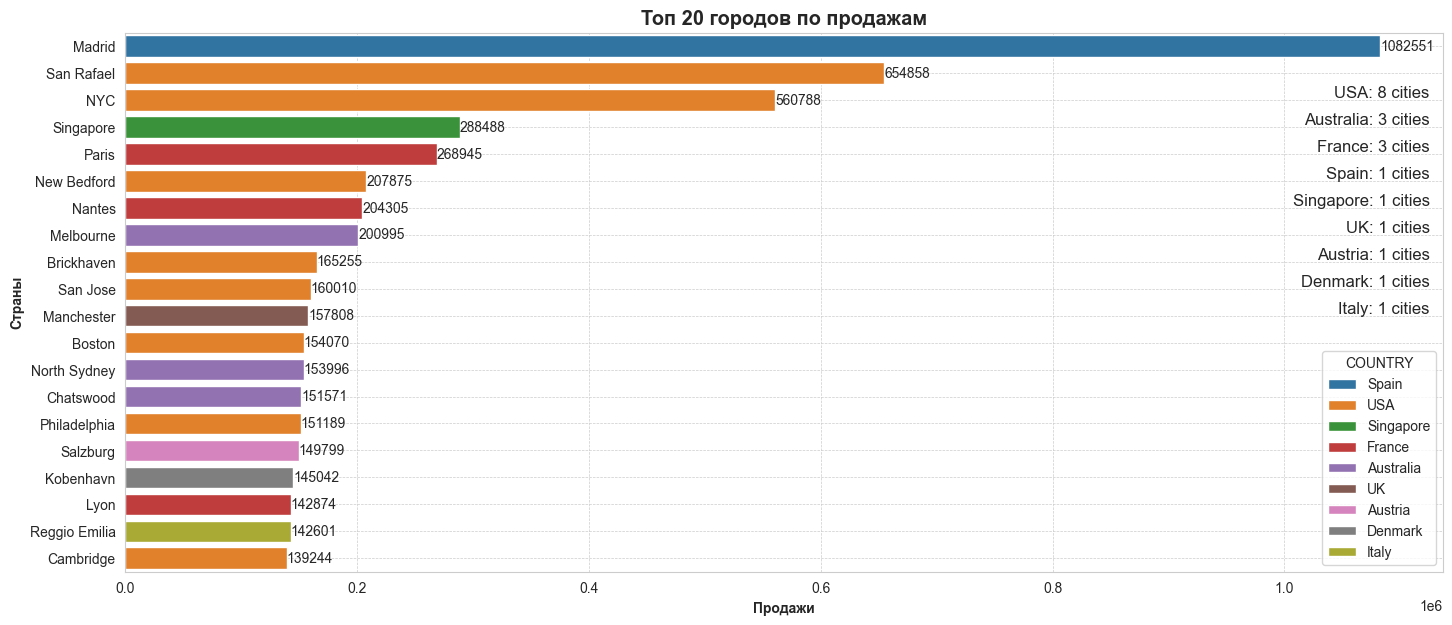

In [14]:
city_sales = df.groupby(['CITY' ,'COUNTRY'])['SALES'].sum().sort_values(ascending=False).reset_index().head(20)

fig, ax = plt.subplots(figsize=(17, 7))

sns.barplot(ax=ax, data=city_sales, y='CITY', x='SALES', hue='COUNTRY')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel('Продажи', fontweight='bold')
ax.set_ylabel('Страны', fontweight='bold')
ax.set_title('Топ 20 городов по продажам', fontweight='heavy', fontsize='x-large')


country_counts = city_sales['COUNTRY'].value_counts()
y_position = 0.88
for country, count in country_counts.items():
    ax.text(0.99, y_position, f'{country}: {count} cities', transform=ax.transAxes, fontsize=12, ha='right')
    y_position -= 0.05

Диаграмма показывает, что самые высокие продажи зарегистрированы в Мадриде, за ним следуют Сан-Рафаэль и Нью-Йорк. В США сконцентрировано большинство городов с высоким объемом продаж, что указывает на значительный рынок в этой стране.

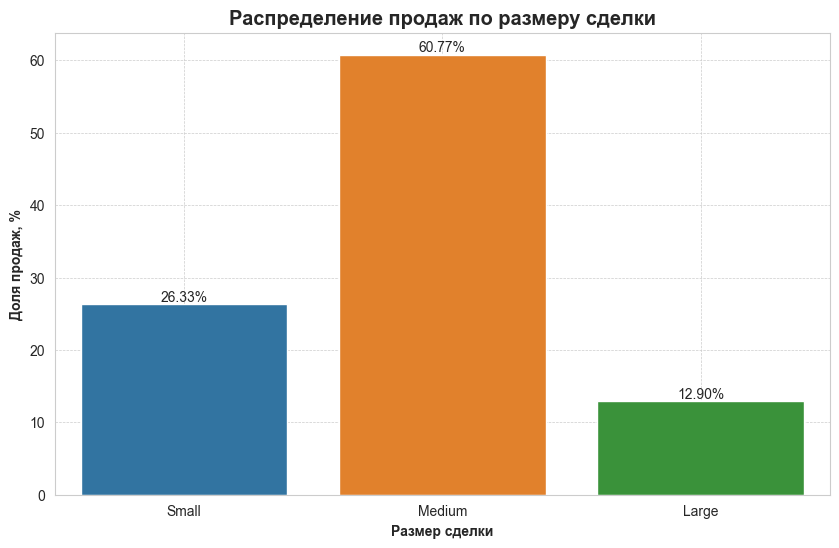

In [15]:
df['DEALSIZE'] = pd.Categorical(df['DEALSIZE'], categories=['Small', 'Medium', "Large"])

deal_size_sales = df.groupby('DEALSIZE', observed=True)['SALES'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

deal_size_sales['Percent'] = deal_size_sales['SALES'] / deal_size_sales['SALES'].sum() * 100
sns.barplot(data=deal_size_sales, x='DEALSIZE', y='Percent', hue='DEALSIZE', ax=ax)

ax.set_xlabel('Размер сделки', fontweight='bold')
ax.set_ylabel('Доля продаж, %', fontweight='bold')
ax.set_title('Распределение продаж по размеру сделки', fontweight='heavy', fontsize='x-large')
ax.grid(True, linestyle='--', linewidth=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

Диаграмма показывает, что наибольшая доля продаж (60.77%) приходится на сделки среднего размера. Сделки малого размера составляют 26.33% от общего объема, а крупные сделки — лишь 12.90%. Это указывает на предпочтение клиентов к сделкам среднего размера.

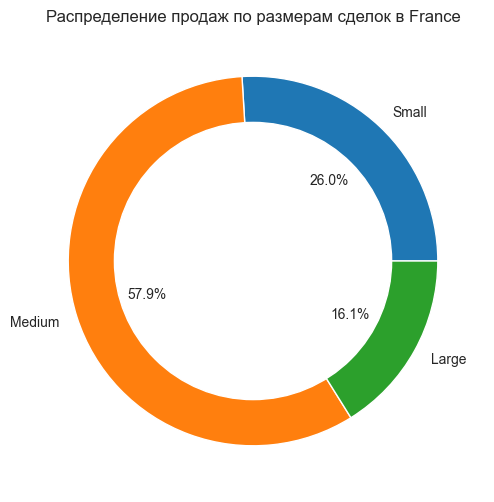

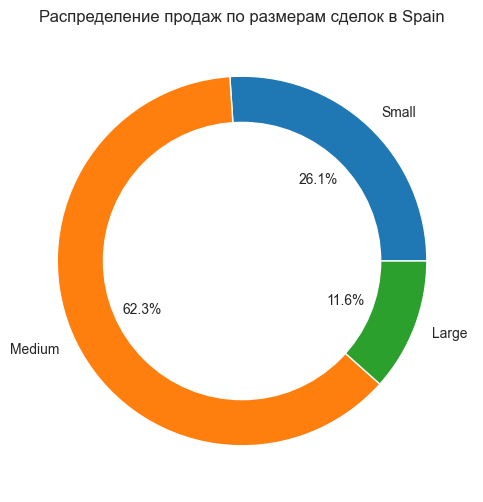

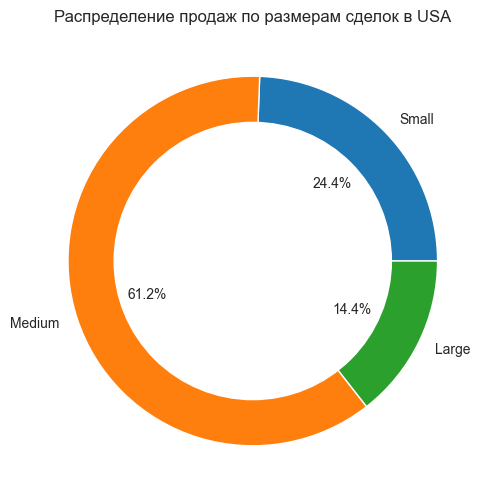

In [16]:
total_sales_by_country_dealsize = df.groupby(['COUNTRY', 'DEALSIZE'], observed=True)['SALES'].sum().reset_index()
total_sales_by_country = df.groupby('COUNTRY', observed=True)['SALES'].sum().reset_index()
total_sales_by_country.columns = ['COUNTRY', 'TOTAL_SALES']

avg_sales_by_dealsize = total_sales_by_country_dealsize.merge(total_sales_by_country, on='COUNTRY')

avg_sales_by_dealsize['SALES_PERCENT'] = (avg_sales_by_dealsize['SALES'] / avg_sales_by_dealsize['TOTAL_SALES']) * 100

selected_countries = avg_sales_by_dealsize[avg_sales_by_dealsize['COUNTRY'].isin(['USA', 'Spain', 'France'])]
countries = selected_countries['COUNTRY'].unique()

for country in countries:
    curr_data = selected_countries[selected_countries['COUNTRY'] == country]

    fig, ax = plt.subplots(figsize=(7, 6))
    wedges, texts, autotexts = ax.pie(curr_data['SALES_PERCENT'], labels=curr_data['DEALSIZE'], autopct='%.1f%%')

    centre_circle = plt.Circle((0,0), 0.75, fc='white')
    fig.gca().add_artist(centre_circle)

    plt.title(f'Распределение продаж по размерам сделок в {country}')


Это распределения аналогичны общему распределению по всем странам, что указывает на стабильные предпочтения клиентов по размеру сделки.

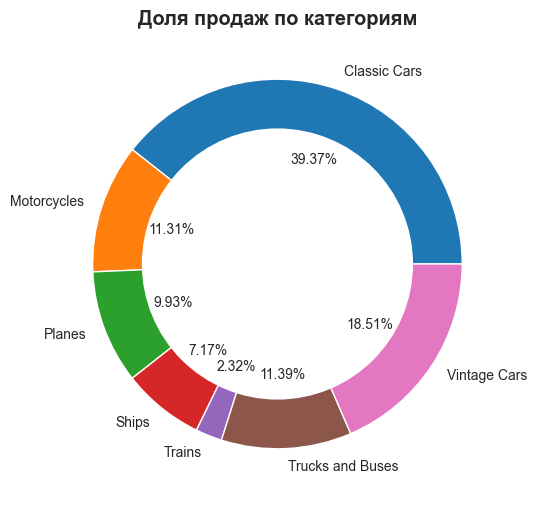

In [17]:
product_type = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

product_type['percent'] = product_type['SALES'] / product_type['SALES'].sum() * 100

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title('Доля продаж по категориям', fontweight='heavy', fontsize='x-large')
wedges, labels, percents = ax.pie(product_type['percent'], labels=product_type['PRODUCTLINE'], autopct='%.2f%%')

centre_circle = plt.Circle((0,0), 0.73, fc='white')
fig.gca().add_artist(centre_circle)


Диаграмма показывает, что наибольшая доля продаж (39.37%) приходится на категорию "Classic Cars". За ней следуют "Vintage Cars" (18.51%)
Это указывает на то, что основную часть продаж составляют классические и винтажные автомобили.

(np.float64(17532.0), np.float64(18414.0))

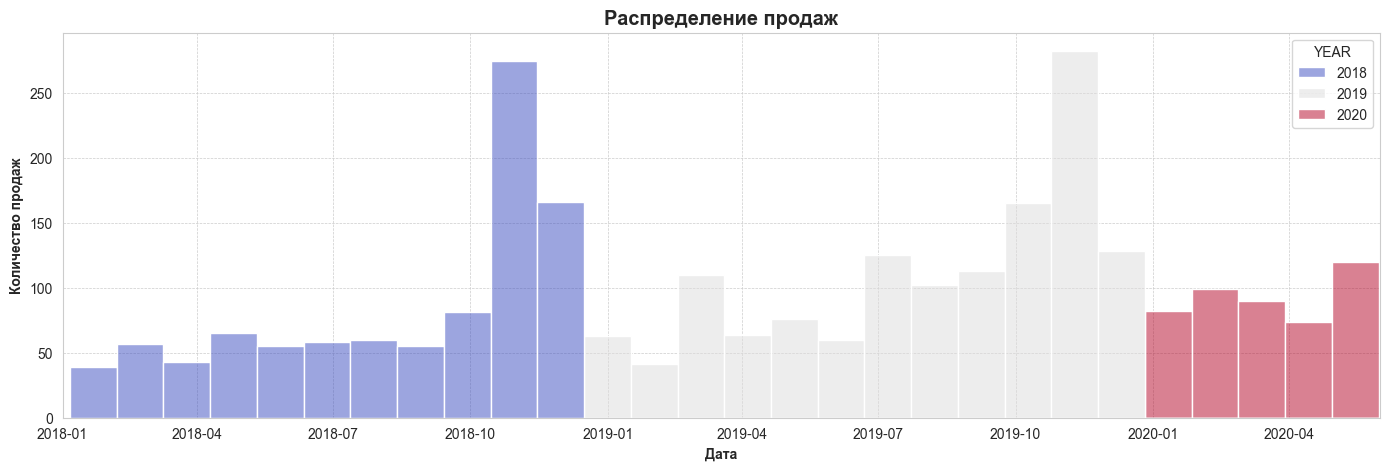

In [18]:
df['YEAR'] = df['ORDERDATE'].dt.year

fig, ax = plt.subplots(figsize=(17, 5))

sns.histplot(ax=ax, data=df, x='ORDERDATE', bins=28, hue='YEAR', palette='coolwarm')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel('Дата', fontweight='bold')
ax.set_ylabel('Количество продаж', fontweight='bold')
ax.set_title('Распределение продаж', fontweight='heavy', fontsize='x-large')

ax.set_xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2020-06-01'))


В 2018 году наблюдается пик продаж в октябре. В 2019 году продажи увеличивались также увеличились в сентябре-октябре. В 2020 году продажи постепенно увеличиваются, начиная с января и продолжают расти к апрелю. Это указывает на сезонные колебания с пиками в конце года и стабильный рост в 2020 году.

Text(0.5, 0, 'Количество заказов')

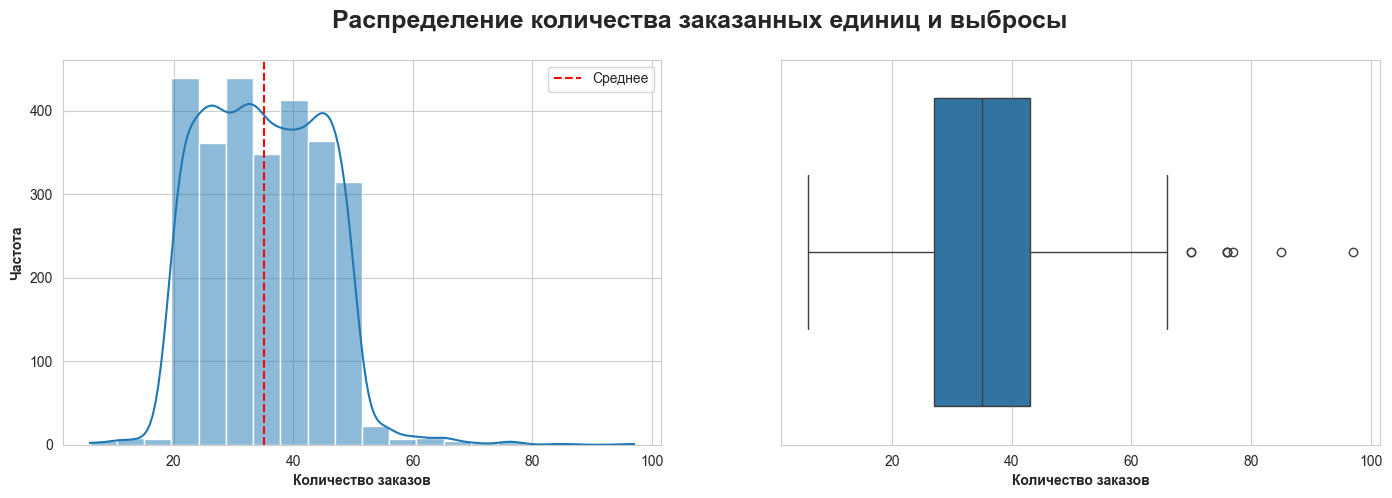

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

fig.suptitle('Распределение количества заказанных единиц и выбросы', fontweight='bold', fontsize=18)

sns.histplot(ax=ax[0], data=df, x='QUANTITYORDERED', kde=True, bins=20)
ax[0].set_xlabel('Количество заказов', fontweight='bold')
ax[0].set_ylabel('Частота', fontweight='bold')
ax[0].axvline(df['QUANTITYORDERED'].mean(), color='red', linestyle='--', label='Среднее')
ax[0].legend()


sns.boxplot(ax=ax[1], data=df, x='QUANTITYORDERED')
ax[1].set_xlabel('Количество заказов', fontweight='bold')



Text(0.5, 1.0, 'Корреляционная матрица')

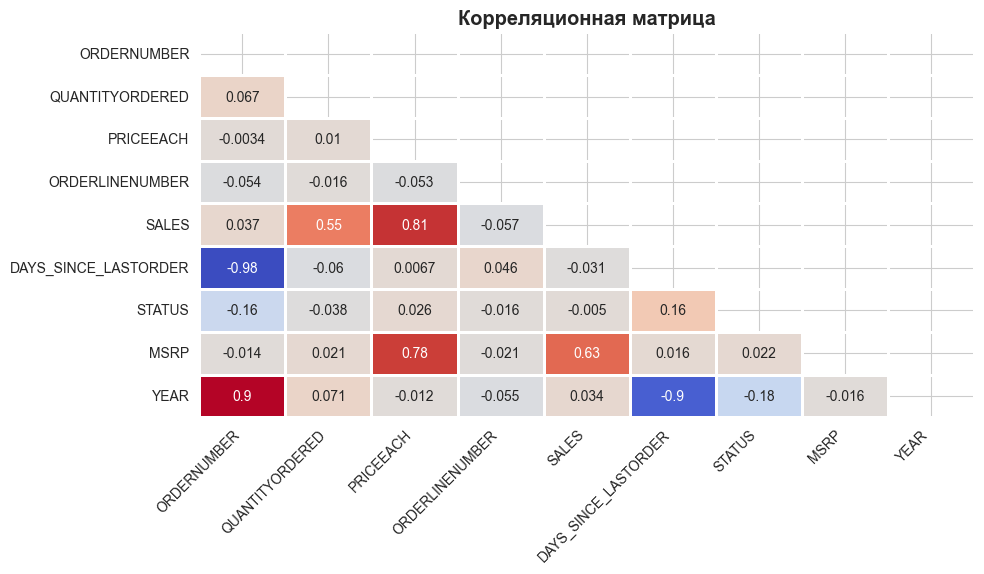

In [20]:
correlation = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(correlation))

sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=None, linewidths=1, mask=mask)
plt.xticks(rotation=45, ha='right')
plt.title('Корреляционная матрица', fontweight='heavy', fontsize='x-large')


1. SALES и PRICEEACH: Чем выше цена за единицу товара, тем больше суммарные продажи.
Это логично, так как при прочих равных условиях увеличение цены приводит к увеличению выручки.

2. SALES и MSRP (рекомендуемая цена): Рекомендованная цена часто коррелирует с фактичискими продажами, что также логично

## 3. Заключение
В ходе анализа данных по продажам было выявлено, что:
1. Наибольший объем продаж приходится на США, Францию и Германию. Эти страны являются ключевыми рынками, на которые стоит ориентироваться в дальнейшем.
2. Клиенты в основном предпочитают сделки среднего размера, что может быть связано с лучшим балансом цены и количества.
3. Основные продуктовые линии, такие как 'Classic Cars' и 'Vintage Cars', составляют значительную часть продаж, и это указывает на их популярность среди покупателей.
4. Анализ временных данных показал, что есть определенные месяцы с повышенными объемами продаж, что может указывать на сезонные тренды, которые следует учитывать при планировании.